# Data Analysis On Heart Disease

Hi every one welcome to the data analysis on heart disease:
The datatset we have before us is a heart disease record, Which i got from kaggle.com a site for getting data, I will be analysing the rate and population that have heart disease, and the tools i will be using is python with its built in libraries to analysize and draw infrences from the dataset, some techiques would include graphs etc. And also want to appriciate [Data Analysis with Python: Zero to Pandas](zerotopandas.com) for taking me through the course of becoming a data analist, I have learnt how to structure, analize, represent and draw infrences from a set of data.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Datasete
I am downloading the dataset from kaggle.com a wonderful site for getting data
I wil be using the opendatasts function to download it to my directory

In [49]:
!pip install jovian opendatasets --upgrade --quiet

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


Let's begin by downloading the data, and listing the files within the dataset.

In [50]:
# Change this
dataset_url = 'https://www.kaggle.com/ronitf/heart-disease-uci?rvi=1' 

In [51]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: kcpele
Your Kaggle Key: ········


  0%|                 | 0.00/3.40k [00:00<?, ?B/s]

100%|█████████| 3.40k/3.40k [00:00<00:00, 497kB/s]


The dataset has been downloaded and extracted.

In [52]:
data_dir = './heart-disease-uci'

In [53]:
import os
os.listdir(data_dir)

['heart.csv']

Let us save and upload our work to Jovian before continuing.

In [54]:
project_name = "data-analysis-on heart-disease" 

In [55]:
!pip install jovian --upgrade -q

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [56]:
import jovian

In [57]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Updating notebook "fidekg123/data-analysis-on-heart-disease" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/fidekg123/data-analysis-on-heart-disease


'https://jovian.ai/fidekg123/data-analysis-on-heart-disease'

## Data Preparation and Cleaning

I will be breaking down the data set into smaller unit for better understanding.
I will also bring out the major information that is contained.
i will give a clear discription about the hole data set



In [58]:
import pandas as pd

In [59]:
heart_df = pd.read_csv('./heart-disease-uci/heart.csv')

In [60]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


From the information below we can clearly see the names of the column dataset and it contains all the information about it
All of the column data type are int64 except for oldpeak which is a float64 data type

In [61]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


When i called the .columns function on the data set, it gave us all the names of the column and also told us the data type whichnis an object

In [62]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

From the data set showing down below, We can now see the mean or also called the average of all the data set

In [63]:
heart_df.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

The describe function works the way it sounds which is it gives a clear description of all the data set at once.
Wow is that not wonderfull
The total number of count of each dataset 
The mean, the standard deviation(std), 
The minimum value(min), 
The percentiles in the form of 25%, 50%, and 75%,
And finally if give us the maximum vlaues(max) of each dataset on its columns

In [64]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [65]:
import jovian

In [66]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "fidekg123/data-analysis-on-heart-disease" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/fidekg123/data-analysis-on-heart-disease


'https://jovian.ai/fidekg123/data-analysis-on-heart-disease'

## Exploratory Analysis and Visualization

In this section i will be representing and showing you a better view of the data set at hand. Which is graphically and You will see the relationship between age and sex to a diseases 


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [67]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [68]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Here we are taking a good look at the disease rate of trestbps and chol while monitoring the age grade that have the diseases.
We can see that with this graph we can clearly say that the age grade that are mostly affected
by this two diseases

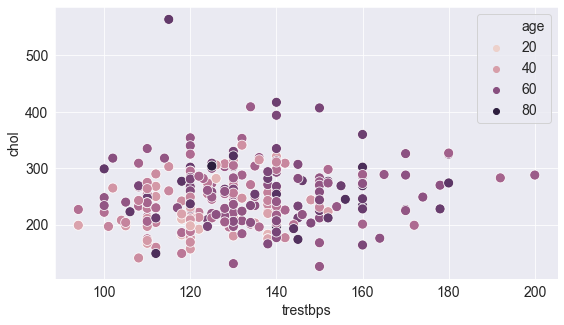

In [69]:
sns.scatterplot(heart_df.trestbps, heart_df.chol,
               hue=heart_df.age,
               s=100);

## Age
Here we notice that the age grade are mostly young adult between the range of 50 to 60 years of age

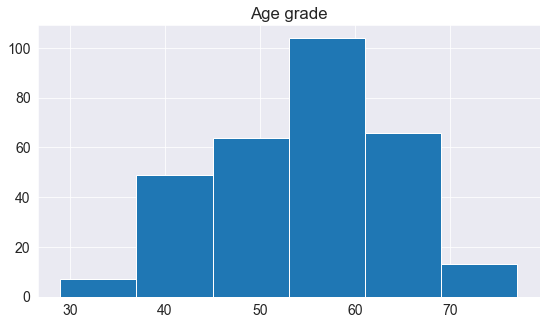

In [70]:
plt.title('Age grade')
plt.hist(heart_df.age, bins=6);

The distribution of the oldpeak.
this indicates the flow and wave of the disease
And we all can see that it is in the range of 0 down to around 4.5 with little traces at 6
And it has a high peak of about 130 in range

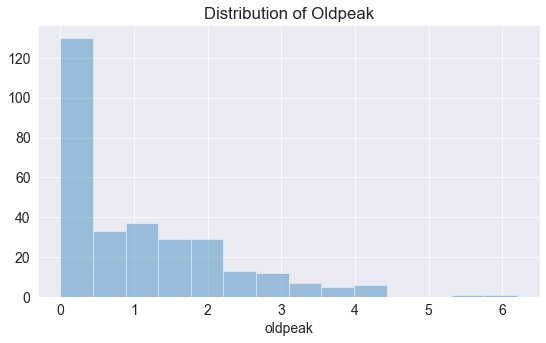

In [71]:
plt.title('Distribution of Oldpeak')
sns.distplot(heart_df.oldpeak, kde=False);

sns.distplot is a simple function for showing simplle graphs that have little intervals between its values

Here we are cchecking to see the age and sex with the highest number of cp.
As you can see that men(0) are the once with the highest in all age grade

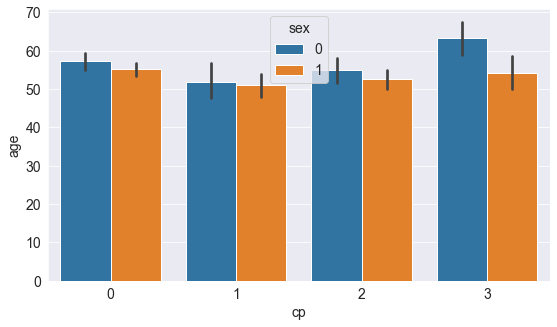

In [72]:
sns.barplot(heart_df.cp, heart_df.age, hue=heart_df.sex);


## Chol Heart Disease
The graph below shows the flow of chol and the peak of the disease at a partitular point

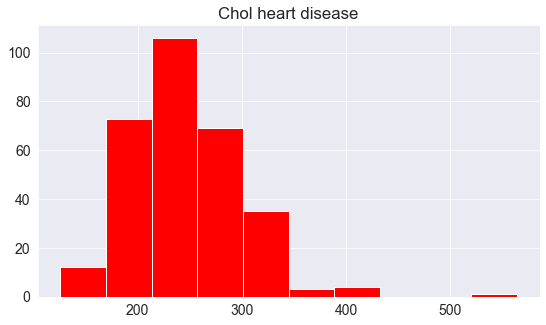

In [73]:
plt.title('Chol heart disease')
plt.hist(heart_df.chol, color='red');

The graph here contains all the details of our data set
it shows the flow of every disease and the peack 
As you can see we have two graph. it is showing the discription of male and female

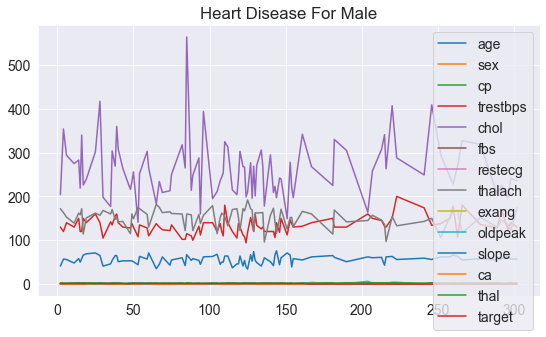

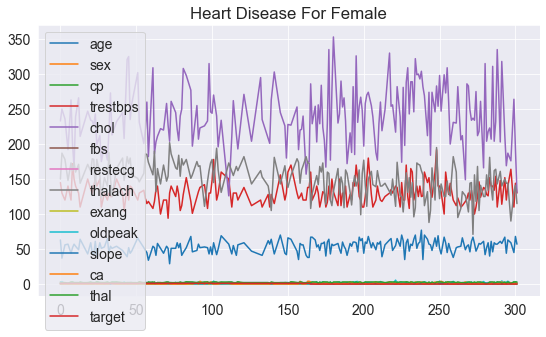

In [74]:

heart_disease_of_male = heart_df[heart_df.sex == 0]
heart_disease_of_female = heart_df[heart_df.sex == 1]
heart_disease_of_male.plot(title='Heart Disease For Male');
heart_disease_of_female.plot(title='Heart Disease For Female');



Let us save and upload our work to Jovian before continuing

In [75]:
import jovian

In [76]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "fidekg123/data-analysis-on-heart-disease" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/fidekg123/data-analysis-on-heart-disease


'https://jovian.ai/fidekg123/data-analysis-on-heart-disease'

## Asking and Answering Questions

In this section, its all about asking and answering questions statistically and drawing good inferences from our data


#### Q1: what is the general information in our data set

In [77]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


the library discribe is a pandas function that gives us the statistical infomation about our data

#### Q2: What is the first 20 men that have the highest trestbps

In [78]:
heart_disease_of_male.sort_values('trestbps', ascending=False).head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1


i used the sort_values pandas function to sort the data base on trestbpy disease and by calling the head function, it allows us to have get the number of rows you want

#### Q3: Show me the sum total of cp, trestbps and chol of only men

In [79]:
heart_disease_of_male.groupby('age')[['cp', 'trestbps', 'chol']].sum()

,cp,trestbps,chol
age,,,
34,1,118,210
35,0,138,183
37,2,120,215
39,4,232,419
41,5,473,976
42,2,222,474
43,2,254,554
44,4,226,383
45,2,380,630


Calling the groupby function is a pandas function thats allows us to look at the data from the age grade and the sum function added all the diseases that are associated to a particular age grade

#### Q4: The first 10 women with the lowest age

In [80]:
heart_disease_of_female.sort_values('age', ascending=True).tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3,0
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


sort_values is a pandas function thats sorts a dataset base on a particular thing or dataset

#### Q5: what is the average of each disease of male and female

In [81]:
heart_df.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


groupby is a pandas function and the mean function gave us the avarage of the entire dataset

Let us save and upload our work to Jovian before continuing.

In [82]:
import jovian

In [83]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "fidekg123/data-analysis-on-heart-disease" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/fidekg123/data-analysis-on-heart-disease


'https://jovian.ai/fidekg123/data-analysis-on-heart-disease'

## Inferences and Conclusion

The dataset on heart disease is a wonderful and powerful dataset every one should know about.
From this little data analysis conducted,
i can clearly say that the male child is more expose to heart diseases
Young adult are at high risk of contacting heart disease
From the graph we can see that the rate of heart disease has gone down and it had on but a few i peaks


In [84]:
import jovian

In [85]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "fidekg123/data-analysis-on-heart-disease" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/fidekg123/data-analysis-on-heart-disease


'https://jovian.ai/fidekg123/data-analysis-on-heart-disease'

## References and Future Work

My inferences on this dataset is that men should be more careful and take heart disease serious
My idea on this dataset is to get all the cure for each disease and its drugs, and attach it to the dataset.
https://pandas.pydata.org/docs/getting_started/index.html
https://www.kaggle.com/datasets
https://jovian.ai/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
https://jovian.ai/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684

In [86]:
import jovian

In [87]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "fidekg123/data-analysis-on-heart-disease" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/fidekg123/data-analysis-on-heart-disease


'https://jovian.ai/fidekg123/data-analysis-on-heart-disease'